In [ ]:
!pip install tensorflow

In [ ]:
# Data Aquisition

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# penamaan biasanya x_{topik benda} sama y_{topik benda} atau {topik_benda}_image atau {topik_benda}_label
# dari https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

170498071/170498071 [==============================] - 4s 0us/step


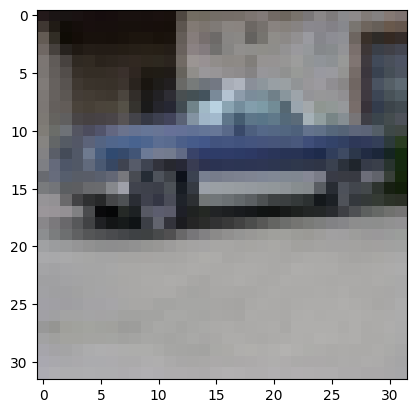

In [ ]:
#untuk plotting gambar dari data training
from matplotlib import pyplot as plt

index = 10000 # foto ke 10000
plt.imshow(x_train[index])
plt.show()
# untuk gambarnya memang low res karena cifar-10 memang ukuran gambarnya kecil

In [ ]:
# Data Preprocessing
# Range pixel itu 0 - 255, nah bakal dinormalisasi jadi 0 - 1, biar cepat soalnya kan banyak datanya

#Sebelum dinormalisasi (range 0-255)
print(x_train[index])

# Sesudah dinormalisasi (range 0-1, mempercepat proses treaining dan hemat compuitational resource)
x_train = x_train / 255
print(x_train[index])


[[[ 35  25  26]
  [ 27  21  21]
  [ 25  20  19]
  ...
  [132 129 129]
  [133 121 116]
  [126 115 113]]

 [[ 63  55  50]
  [ 32  27  21]
  [ 17  13   8]
  ...
  [102  95  88]
  [105  89  76]
  [100  86  77]]

 [[ 99  91  84]
  [ 49  45  37]
  [ 15  12   5]
  ...
  [ 46  43  39]
  [ 52  41  34]
  [ 52  44  41]]

 ...

 [[166 165 171]
  [164 163 166]
  [164 164 165]
  ...
  [173 172 170]
  [170 170 168]
  [167 167 167]]

 [[169 168 176]
  [169 168 173]
  [168 168 171]
  ...
  [172 171 170]
  [168 167 167]
  [165 165 166]]

 [[173 172 179]
  [175 174 178]
  [173 173 175]
  ...
  [170 168 169]
  [168 167 168]
  [166 166 168]]]
[[[0.1372549  0.09803922 0.10196078]
  [0.10588235 0.08235294 0.08235294]
  [0.09803922 0.07843137 0.0745098 ]
  ...
  [0.51764706 0.50588235 0.50588235]
  [0.52156863 0.4745098  0.45490196]
  [0.49411765 0.45098039 0.44313725]]

 [[0.24705882 0.21568627 0.19607843]
  [0.1254902  0.10588235 0.08235294]
  [0.06666667 0.05098039 0.03137255]
  ...
  [0.4        0.3725490

In [ ]:
# Normalisasi data testing
x_test = x_test / 255
print(x_test)

[[[[2.42983468e-03 1.72241446e-03 7.53556324e-04]
   [2.44521338e-03 1.70703576e-03 7.22798923e-04]
   [2.53748558e-03 1.78392926e-03 7.84313725e-04]
   ...
   [2.10688197e-03 1.46097655e-03 5.53633218e-04]
   [1.93771626e-03 1.39946175e-03 5.53633218e-04]
   [1.78392926e-03 1.30718954e-03 5.07497116e-04]]

  [[2.33756248e-03 1.72241446e-03 7.84313725e-04]
   [2.32218378e-03 1.69165705e-03 6.15148020e-04]
   [2.44521338e-03 1.75317186e-03 6.92041522e-04]
   ...
   [2.09150327e-03 1.46097655e-03 4.76739715e-04]
   [1.92233756e-03 1.39946175e-03 4.92118416e-04]
   [1.83006536e-03 1.35332564e-03 5.22875817e-04]]

  [[2.32218378e-03 1.69165705e-03 7.22798923e-04]
   [2.32218378e-03 1.67627835e-03 5.07497116e-04]
   [2.42983468e-03 1.70703576e-03 5.53633218e-04]
   ...
   [2.13763937e-03 1.50711265e-03 5.22875817e-04]
   [1.99923106e-03 1.46097655e-03 5.22875817e-04]
   [1.84544406e-03 1.36870434e-03 5.07497116e-04]]

  ...

  [[1.04575163e-03 1.90695886e-03 2.72202999e-03]
   [6.45905421e-

In [ ]:
# [0,0,0,0,0,0,0,0,0] class akan diubah menjadi binary
# untuk pakai softmax activation function

from tensorflow import keras
# Sebelum di one hot encoding
print(y_train)

# Setelah di one hot encoding
y_train = keras.utils.to_categorical(y_train, 10) # 10 ini 10 class
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Sekarang, One hot encoding untuk test data
y_test = keras.utils.to_categorical(y_test, 10)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# Modeling, membuat model ML

from tensorflow.keras.models import Sequential
# Sequential ini model paling standar, akan membuat layer menjadi network yang sequence/berurutan
from tensorflow.keras.layers import Dense, Flatten
# Layersnya

# pake size soalnya ya ratio 1:1
img_size = 32
channel = 3 # 3 dari RGB, red, green, blue

# Kita akan membandingkan 2 model mana yg kinerjanya lebih bagus
# Model 1
simple_model = Sequential([
    Flatten(input_shape=(img_size, img_size, channel)),
    # ini 32, 32, 3, kalo nggak ratio 1:1 ya nggak dobel img_size
    Dense(10000, activation='relu'),
    # Angkanya units itu eksperimen saja, terserah, buat membandingkan semisal sama 20000 itu hasilnya lebih bagus mana
    # Units, berapa banyak layer yang akan dibuat, biasanya kelipatan 8
    # Image itu nggak linear tp complex, jadi butuh activation function, ini kita pake ReLU
    Dense(10, activation='softmax')
    # Ingat kalo multiclass pakai softmax
])

# Kita perlu complie modelnya juga kalo di TensorFlow
simple_model.compile(
    optimizer='sgd', # akan menjalankan algoritma gradient design
    loss='categorical_crossentropy', # menyesuaikan, kalo binary ya binary_crossentropy
    metrics=['accuracy'] # apa saja sih variabel yang bakal dicompare antara model 1 ini same nanti model 2 yang lebih kompleks
)

# Untuk melihat layernya :
simple_model.summary()

# flatten_1 --> input layer
# dense_2 --> hidden layer
# dense_3 --> output layer


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 10000)             30730000  
                                                                 
 dense_3 (Dense)             (None, 10)                100010    
                                                                 
Total params: 30830010 (117.61 MB)
Trainable params: 30830010 (117.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model Training di background!

simple_model_history = simple_model.fit( # Untuk parameternya fit ada banyak tp utk sekarang kita perlu nya x dan y saja
  x=x_train,
  y=y_train,
  epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 20s 10ms/step - loss: 1.8209 - accuracy: 0.3556
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6342 - accuracy: 0.4281
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5585 - accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5046 - accuracy: 0.4739
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4581 - accuracy: 0.4933
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4211 - accuracy: 0.5064
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3876 - accuracy: 0.5178
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3572 - accuracy: 0.5303
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3290 - accuracy: 0.5392
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step -

In [ ]:
# Untuk plotting hasil training, akurasi di setiap device bisa beda,
# tapi ini ak dapet 0,5472 berarti 54% accuracy which is not bad not good either

import matplotlib.pyplot as plt

# buat design graphnya
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

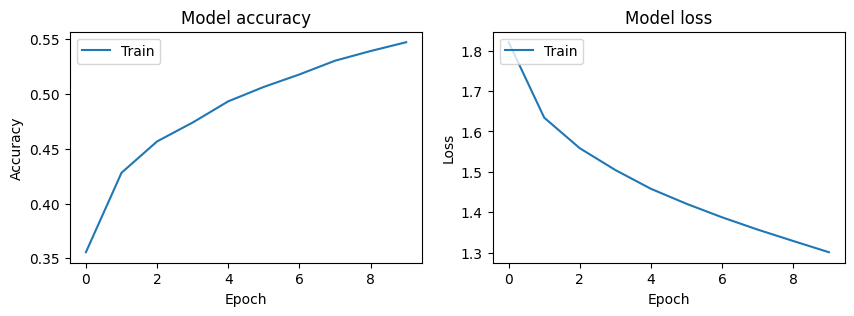

In [ ]:
plot_history(simple_model_history, "Accuracy Model Training 10 Epoch with Simple Neural Network")
# Dengan 10 epoch saja accuracynya meningkat drastis
# Bisa dicoba apakah kalo epochs nya makin banyak, semisal 20, apakah accuracynya makin bagus juga

In [ ]:
# Model 2

# Kalo yg Model 2 hanya pake 1 hidden layer, nah ini yg complex bakal pake 2 atau lebih
complex_model = Sequential([
    Flatten(input_shape=(img_size, img_size, channel)),
    Dense(10000, activation='relu'), # multiple hidden layer, angkanya nggak harus sepattern ini, bisa variasi
    Dense(1000, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

complex_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

complex_model.summary()

# Total parameternya lebih banyak, hidden layernya lbh banyak!

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 10000)             30730000  
                                                                 
 dense_9 (Dense)             (None, 1000)              10001000  
                                                                 
 dense_10 (Dense)            (None, 100)               100100    
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 40832110 (155.76 MB)
Trainable params: 40832110 (155.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model 2 Training

complex_model_history = complex_model.fit(
    x=x_train,
    y=y_train,
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8328 - accuracy: 0.3431
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6224 - accuracy: 0.4221
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5306 - accuracy: 0.4577
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4692 - accuracy: 0.4785
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4155 - accuracy: 0.4973
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3675 - accuracy: 0.5162
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3241 - accuracy: 0.5314
Epoch 8/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.2849 - accuracy: 0.5470
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2502 - accuracy: 0.5580
Epoch 10/10
1563/1563 [==============================] - 23s 15m

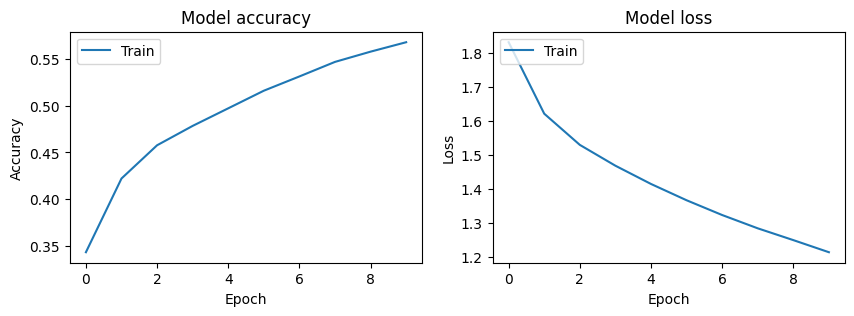

In [ ]:
# Oke aku dapet 0.5681, naik sekitar 2-3%
plot_history(complex_model_history, "Accuracy Model Training 10 Epoch with Complex Neural Network")


In [ ]:
# Prediction, ngetes buat data yang tidak ada di data yg ketraining

import numpy as np

# kita pake random index
index = np.random.randint(0, 10000) # karena tadi kita testing sampe 10000, ya dari 0 sampe 10000
print('Index for testing data: ', index)

# yang didapet Ko Michael Eko 9984

Index for testing data:  7830


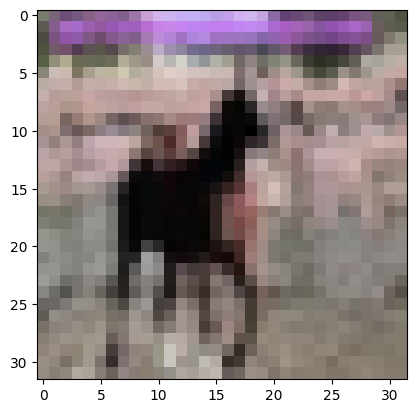

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(x_train[index])
plt.show()

1/1 [==============================] - 0s 17ms/step
Hasil prediksi array Simple NN: [[0.04653797 0.00412279 0.14447844 0.29153118 0.06092257 0.17346802
  0.0489823  0.22032021 0.00142504 0.00821144]]
Hasil prediksi Simple NN: 3


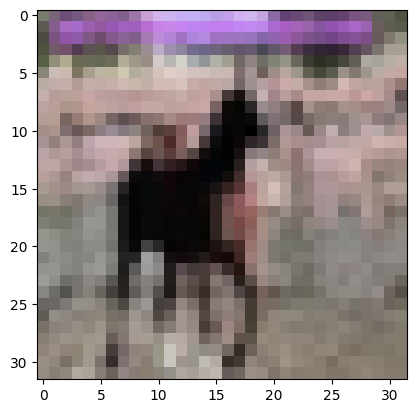

In [ ]:
# Oke, sekarang beneran Predictionnya

from tensorflow.keras.preprocessing import image
import cv2

img = cv2.resize(x_train[index], (img_size, img_size))
# sebenarnya tdk perlu diresize sih, tapi jaga" semisal ada yang lebih dari 32 x 32

imgplot = plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # ekspansi dimensi, Semisal gambar (32,32,3) menjadi (1,32,32,3), supaya bisa masuk ke model kita
img_array = np.vstack([img_array]) # vertical stacking

# Prediction ke Simple Model dulu
simple_classes =  simple_model.predict(img_array)
print("Hasil prediksi array Simple NN:", simple_classes)
# Nanti keluarnya array doank, nah biar lihatnya lebih enak -->
simple_index = np.argmax(simple_classes)
# Mengambil index dari angka terbesar dalam sebuah array
print("Hasil prediksi Simple NN:", simple_index)
# Hasilnya index 3, berarti kalo di website itu Cat... ???

1/1 [==============================] - 0s 20ms/step
Hasil prediksi array Complex NN: [[0.09403687 0.01386043 0.09848517 0.15587589 0.15698959 0.19432269
  0.04314369 0.14232565 0.00635499 0.09460495]]
Hasil prediksi Complex NN: 5


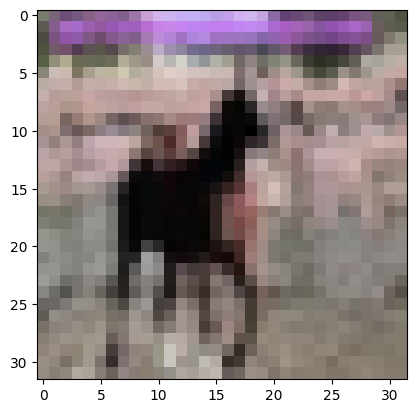

In [ ]:
# Prediction untuk Complex Model

imgplot = plt.imshow(img)

complex_classes =  complex_model.predict(img_array)
print("Hasil prediksi array Complex NN:", complex_classes)

complex_index = np.argmax(complex_classes)
print("Hasil prediksi Complex NN:", complex_index)
# Hasilnya 5 atau Dog, actually bener sih

In [ ]:
# Notes

# Overfitting, ketika hanya bagus saat training, jadi terlalu menghafal, saat diberi data lain blunder
# 1. Mengubah arsitektur model
# 2. Mengubah kedalaman layer, units --> terlalu banyak unit maupun layer juga tidak bagus ya, terlalu sedikit apalagi, makanya harus dieksperimen

# Underfitting, buruk di semuanya

# Biasakan codesnya buat dimasukin ke def / function, biar efisien kayak buat matplotlibnya